# Word Embeddings

### Libraries

In [3]:
# import libraries

import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

### Datasets

In [2]:
# load review sentiment data

review_df = pd.read_csv('review_sentiment.csv')

review_df

,review_id,text,positive,neutral,negative
0,NvusujU9_5pIUbn9SZ6hMA,Stopped by to munch a burger during today's Se...,1,0,0
1,vHOeBa7aMA_na4rfS2Db5A,"Yelp doesn't allow to leave 0 star review, so ...",0,0,1
2,hG9RTxxivb0ZXzEk4JXTXA,I find it hard to believe there are so many pe...,0,0,1
3,zIVkwgahZjOneChZFUYY4g,Love this place! Almost all of their menu item...,1,0,0
4,DLczAuvMAlAnY5EeDGhTVg,Excellent customer service. I wish I could ren...,1,0,0
...,...,...,...,...,...
63446,OgoBp7fbXnLSKvsQb4O_tw,"I really loved the food and service. I mean, t...",1,0,0
63447,Q7e8EtZMmdknDrQE7huMoQ,Their Grove location was the bomb. Delicious f...,1,0,0
63448,zzMW6zbsFaQMjoGu2bGVdA,A nice ean BBQ joint right across from some ne...,1,0,0
63449,scgoa60EvhW2Mz7JMqLYGw,The perfect Hookah bar. I'm not sure what they...,1,0,0


### Preprocessing

In [4]:
# preprocess the reviews using gensim

corpus = []
for review in review_df['text']:
    corpus.append(simple_preprocess(review))

In [5]:
# see content of processed reviews

for review in corpus[:5]:
    print('-' * 50)
    print(review)

--------------------------------------------------
['stopped', 'by', 'to', 'munch', 'burger', 'during', 'today', 'seahawks', 'saints', 'game', 'and', 'the', 'place', 'was', 'unsurprisingly', 'packed', 'for', 'good', 'reason', 'too', 'the', 'haven', 'burger', 'ordered', 'was', 'fantastic', 'sat', 'right', 'next', 'to', 'the', 'door', 'so', 'didn', 'get', 'the', 'chance', 'to', 'get', 'more', 'than', 'six', 'feet', 'into', 'the', 'place', 'as', 'soon', 'as', 'got', 'my', 'meal', 'the', 'place', 'started', 'getting', 'busier', 'and', 'busier', 'until', 'had', 'to', 'work', 'my', 'way', 'through', 'the', 'world', 'shortest', 'people', 'maze', 'to', 'get', 'out', 'guess', 'that', 'means', 'wasn', 'the', 'first', 'person', 'to', 'hear', 'about', 'the', 'place', 'will', 'be', 'going', 'back', 'to', 'the', 'haven', 'might', 'go', 'for', 'say', 'lunch', 'on', 'tuesday', 'so', 'it', 'less', 'busy']
--------------------------------------------------
['yelp', 'doesn', 'allow', 'to', 'leave', 'star

### Dense embeddings

In [11]:
# documents representing reviews

documents = corpus

len(documents)

63451

In [12]:
# see contents of documents

print(documents[0])

['stopped', 'by', 'to', 'munch', 'burger', 'during', 'today', 'seahawks', 'saints', 'game', 'and', 'the', 'place', 'was', 'unsurprisingly', 'packed', 'for', 'good', 'reason', 'too', 'the', 'haven', 'burger', 'ordered', 'was', 'fantastic', 'sat', 'right', 'next', 'to', 'the', 'door', 'so', 'didn', 'get', 'the', 'chance', 'to', 'get', 'more', 'than', 'six', 'feet', 'into', 'the', 'place', 'as', 'soon', 'as', 'got', 'my', 'meal', 'the', 'place', 'started', 'getting', 'busier', 'and', 'busier', 'until', 'had', 'to', 'work', 'my', 'way', 'through', 'the', 'world', 'shortest', 'people', 'maze', 'to', 'get', 'out', 'guess', 'that', 'means', 'wasn', 'the', 'first', 'person', 'to', 'hear', 'about', 'the', 'place', 'will', 'be', 'going', 'back', 'to', 'the', 'haven', 'might', 'go', 'for', 'say', 'lunch', 'on', 'tuesday', 'so', 'it', 'less', 'busy']


In [13]:
# model training

model = Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)

In [14]:
# embeddings

model.wv.get_vector("good")

array([-2.16018721e-01, -6.42977431e-02, -9.90256434e-04,  1.71694197e-02,
        2.70710409e-01, -4.43431474e-02,  2.16883779e-01,  2.56874830e-01,
        1.77468270e-01,  4.68945429e-02,  2.43836716e-01, -1.06404543e-01,
       -2.29408145e-01,  9.13602039e-02, -1.47572160e-01,  2.50020176e-01,
        1.99610298e-03, -9.40790251e-02, -5.96108176e-02,  1.22396260e-01,
        8.68441239e-02, -6.89013004e-02,  2.73171932e-01,  1.57560661e-01,
        1.16040193e-01,  1.01271078e-01, -5.70209250e-02,  3.83393243e-02,
       -1.47125870e-01, -1.48275390e-01,  4.02981304e-02,  2.45573431e-01,
        1.52489677e-01, -1.79623619e-01, -1.79631159e-01,  4.06486448e-03,
       -1.84074283e-01,  1.03501119e-02,  6.37542903e-02,  2.73255527e-01,
        9.80985984e-02, -7.02908486e-02,  1.40460543e-02, -1.36867464e-01,
        8.75460207e-02,  4.23871912e-02, -1.85557768e-01,  2.82960478e-02,
       -6.52791038e-02,  1.45767722e-02, -3.03036571e-01,  6.15699403e-02,
        1.89170331e-01, -

In [15]:
# similarity

model.wv.most_similar(positive="good")

[('decent', 0.768552839756012),
 ('great', 0.760156512260437),
 ('tasty', 0.7574518918991089),
 ('justifiable', 0.709621012210846),
 ('egregiously', 0.7045932412147522),
 ('definetly', 0.7034106850624084),
 ('enviroment', 0.702587902545929),
 ('zapp', 0.7014052867889404),
 ('delicious', 0.7007278203964233),
 ('gauc', 0.7004209756851196)]

In [16]:
# similarity

model.wv.most_similar(positive="bad")

[('terrible', 0.7282092571258545),
 ('horrible', 0.6699198484420776),
 ('good', 0.6643328070640564),
 ('marred', 0.6565530300140381),
 ('ehh', 0.6371792554855347),
 ('sucked', 0.6368367671966553),
 ('veiny', 0.6348840594291687),
 ('harsh', 0.6341089010238647),
 ('crappy', 0.6335166096687317),
 ('awful', 0.6224693655967712)]

In [17]:
# save full model (including trainable vectors to resume training)

model.save("reviews_model")

In [18]:
# save model word vectors

model.wv.save("reviews_wv")

### Vector visualization

In [19]:
def reduce_dimensions(model, num_dimensions=2, words=[]):
    '''
    Reduce the dimensions of the word vectors using t-SNE for plotting
    '''
    vectors = []
    labels = []
    if (words == []):
        words = model.wv.index_to_key
    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=2.0)
    vectors = tsne.fit_transform(vectors)
    return vectors, labels

In [20]:
def plot_word_vectors(x_vals, y_vals, labels, words=[]):
    '''
    Plot the reduced dimensions of the word vectors using matplotlib
    '''
    random.seed(0)
    x_vals_new = np.array([])
    y_vals_new = np.array([])
    labels_new = np.array([])
    if(words == []):
        x_vals_new = x_vals
        y_vals_new = y_vals
        labels_new = labels
    else:
        for i in range(len(labels)):
            if(labels[i] in words):
                x_vals_new = np.append(x_vals_new,x_vals[i])
                y_vals_new = np.append(y_vals_new,y_vals[i])
                labels_new = np.append(labels_new,labels[i])
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals_new, y_vals_new)
    for i in range(len(labels_new)):
        plt.annotate(labels_new[i], (x_vals_new[i], y_vals_new[i]))
    plt.show()

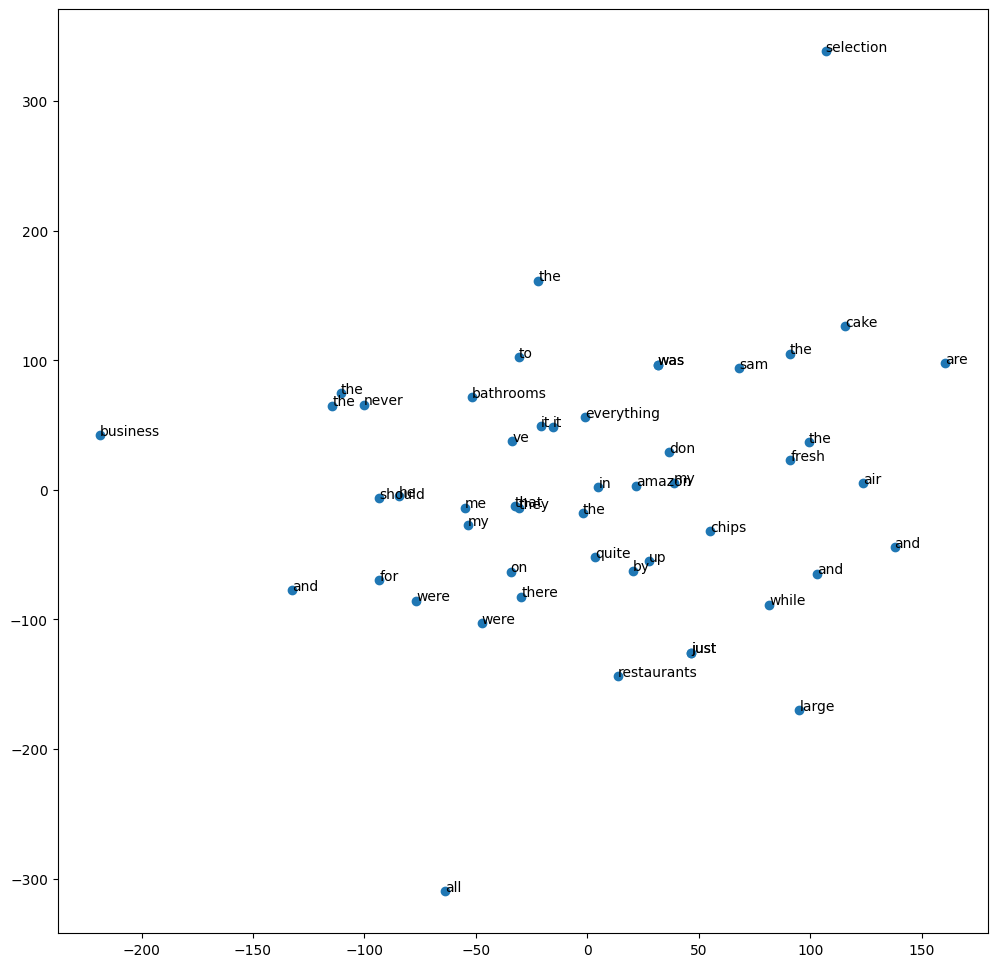

In [25]:
# visualize word vectors

all_words = [word for doc in documents for word in doc]
words = random.sample(all_words, 50)

vectors, labels = reduce_dimensions(model, 3, words)
x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plot_word_vectors(x_vals, y_vals, labels, words)